In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.stats import entropy
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

In [2]:
#read csv
df_data = pd.read_csv('banana(with class label).csv')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       4811 non-null   float64
 1   y       4811 non-null   float64
 2   class   4811 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 112.9 KB


In [3]:
df_data.head()

,x,y,class
0,0.228,0.559,1
1,0.216,0.528,1
2,0.221,0.552,1
3,0.215,0.538,1
4,0.224,0.548,1


In [4]:
df = df_data.copy().drop(['class'],axis=1)
X = df.values
df_data['class'] = df_data['class'].apply(lambda x: 0 if x == 1 else 1)
y = df_data['class'].values

df.describe()

,x,y
count,4811.000000,4811.000000
mean,0.507526,0.585699
std,0.199895,0.209993
min,0.182000,0.163000
25%,0.360000,0.414000
50%,0.484000,0.609000
75%,0.629500,0.772000
max,0.872000,0.926000


In [5]:
#k-means
startTime = time.time()

km = KMeans(n_clusters=2, n_init='auto',random_state =2)
km.fit(X)
y_pred = km.predict(X)

time_con = time.time()-startTime
print('-----time consumption-----')
print('%0.3f seconds'%time_con)

-----time consumption-----
0.134 seconds


In [6]:
#k menas SSE
sse_km = km.inertia_
print('-----SSE-----')
print('%0.3f'%sse_km)

-----SSE-----
185.202


In [7]:
#k means accuracy
label_km = km.labels_
accuracy_km = accuracy_score(y, label_km)
print('accuracy: %0.3f'%accuracy_km)

accuracy: 0.829


In [8]:
# k means entropy
conf_matrix_km = confusion_matrix(y, label_km)
prob_conf_matrix_km = conf_matrix_km / conf_matrix_km.sum(axis=0,keepdims=True)
entropies_km = entropy(prob_conf_matrix_km.T, axis=1,base=2)
print('conf_matrix')
print(conf_matrix_km)
print('each entorpy')
print(entropies_km)
overall_entropy_km = np.sum(entropies_km * (np.sum(conf_matrix_km, axis=0) / len(y)))
print(f"Overall Clustering Entropy: {overall_entropy_km:.4f}")

conf_matrix
[[2184  336]
 [ 489 1802]]
each entorpy
[0.68646772 0.62746272]
Overall Clustering Entropy: 0.6602


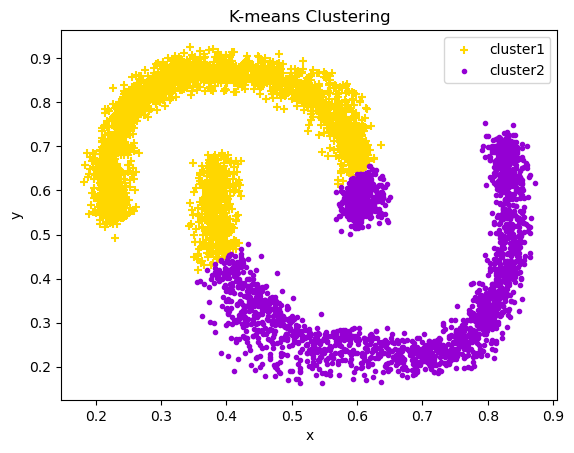

In [9]:
#plot
plt.title('K-means Clustering')
plt.xlabel('x')
plt.ylabel('y')
markers = ['+','.']
colormap = ['gold','darkviolet']
labelmap = ['cluster1','cluster2']
for i, c in enumerate(np.unique(y_pred)):
    plt.scatter(X[:,0][y_pred==c],X[:,1][y_pred==c],c=colormap[i], marker=markers[i],label=labelmap[i])
plt.legend()
plt.show()

In [10]:
#heirarchical clustering
startTime = time.time()

cls = AgglomerativeClustering(n_clusters=2,linkage='ward')
y_pred_cls = cls.fit_predict(X)


time_con = time.time()-startTime
print('-----time consumption-----')
print('%0.3f seconds'%time_con)

-----time consumption-----
0.320 seconds


In [11]:
#heirarchical clustering
centroids =[]
for i in range (2):
    cluster_points = X[y_pred_cls == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)
sse_h = 0
for i, centroid in enumerate(centroids):
    cluster_points = X[y_pred_cls == i]
    cluster_sse = np.sum((cluster_points - centroid) ** 2)
    sse_h += cluster_sse
print('-----SSE-----')
print('%0.3f'%sse_h)

-----SSE-----
222.590


In [12]:
#heirarchical clustering accuracy
label_cls = y_pred_cls
accuracy_h = accuracy_score(y, label_cls)
print('accuracy: %0.3f'%accuracy_h)

accuracy: 0.787


In [13]:
#heirarchical clustering entropy
conf_matrix_cls = confusion_matrix(y, label_cls)
prob_conf_matrix_cls = conf_matrix_cls / conf_matrix_cls.sum(axis=0,keepdims=True)
entropies_cls = entropy(prob_conf_matrix_cls.T, axis=1,base=2)
print('conf_matrix')
print(conf_matrix_cls)
print('each entropy')
print(entropies_cls)
overall_entropy_cls = np.sum(entropies_cls * (np.sum(conf_matrix_cls, axis=0) / len(y)))
print(f"Overall Clustering Entropy: {overall_entropy_cls:.4f}")

conf_matrix
[[2520    0]
 [1027 1264]]
each entropy
[0.86812688 0.        ]
Overall Clustering Entropy: 0.6400


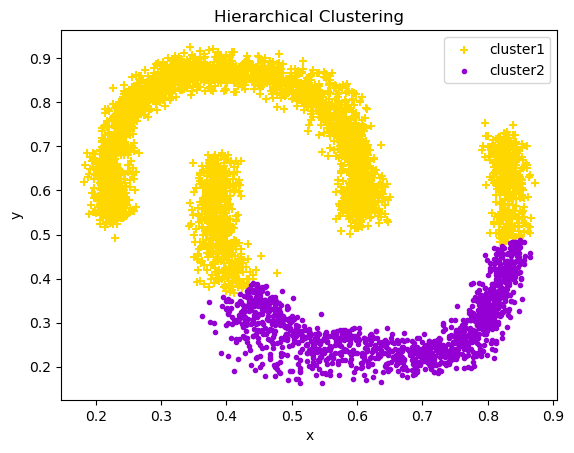

In [14]:
#plot
plt.title('Hierarchical Clustering')
plt.xlabel('x')
plt.ylabel('y')
markers = ['+','.']
colormap = ['gold','darkviolet']
labelmap = ['cluster1','cluster2']
for i, c in enumerate(np.unique(y_pred_cls)):
    plt.scatter(X[:,0][y_pred_cls==c],X[:,1][y_pred_cls==c],c=colormap[i], marker=markers[i],label=labelmap[i])
plt.legend()
plt.show()

In [15]:
# DBSCAN
startTime = time.time()

dbscan = DBSCAN(eps=0.03, min_samples=5)
y_pred_db = dbscan.fit_predict(X)

time_con = time.time()-startTime
print('-----time consumption-----')
print('%0.3f seconds'%time_con)

-----time consumption-----
0.047 seconds


In [16]:
#DBSCAN SSE
centroids_db =[]
for i in range (2):
    cluster_points_db = X[y_pred_db == i]
    centroid_db = np.mean(cluster_points_db, axis=0)
    centroids_db.append(centroid_db)
sse_db = 0
for i, centroid in enumerate(centroids_db):
    cluster_points_db = X[y_pred_db == i]
    dbscan_sse = np.sum((cluster_points_db - centroid) ** 2)
    sse_db += dbscan_sse
print('-----SSE-----')
print('%0.3f'%sse_db)

-----SSE-----
226.940


In [17]:
#DBSCAN accuracy
label_db = y_pred_db
accuracy_db = accuracy_score(y, label_db)
print('accuracy: %0.3f'%accuracy_db)

accuracy: 0.999


In [18]:
#DBSCAN entropy
conf_matrix_db = confusion_matrix(y, label_db)
prob_conf_matrix_db = conf_matrix_db / conf_matrix_db.sum(axis=0,keepdims=True)
entropies_db = entropy(prob_conf_matrix_db.T, axis=1,base=2)
print('conf_matrix')
print(conf_matrix_db)
print('each entropy')
print(entropies_db)
overall_entropy_db = np.sum(entropies_db * (np.sum(conf_matrix_db, axis=0) / len(y)))
print(f"Overall Clustering Entropy: {overall_entropy_db:.4f}")

conf_matrix
[[   0    0    0]
 [   0 2520    0]
 [   3    0 2288]]
each entropy
[0. 0. 0.]
Overall Clustering Entropy: 0.0000


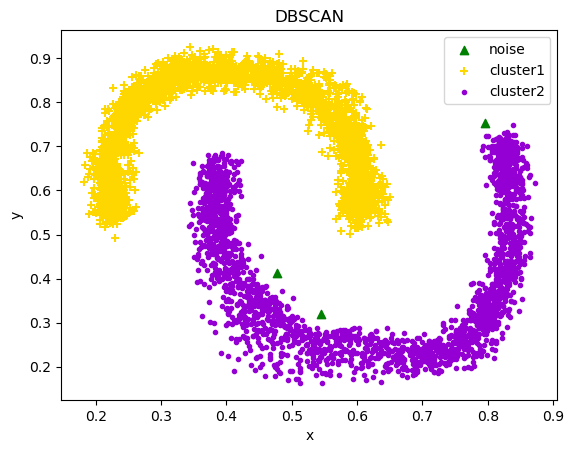

In [19]:
#plot
plt.title('DBSCAN')
plt.xlabel('x')
plt.ylabel('y')
markers = ['^','+','.']
colormap = ['g','gold','darkviolet']
labelmap = ['noise','cluster1','cluster2']

for i,label in enumerate(np.unique(y_pred_db)):
    cluster_mask = (y_pred_db== label)
    plt.scatter(X[:,0][cluster_mask],X[:,1][cluster_mask],
                c=colormap[i], marker=markers[i],label=labelmap[i])
plt.legend()
plt.show()

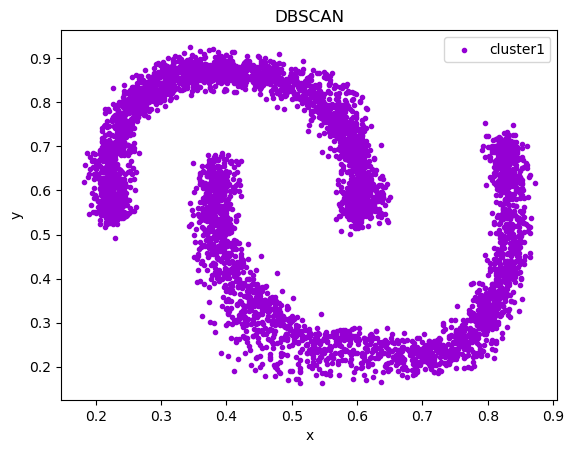

In [20]:
#change eps
dbscan2 = DBSCAN(eps=0.1, min_samples=4)
y_pred_db2 = dbscan2.fit_predict(X)

plt.title('DBSCAN')
plt.xlabel('x')
plt.ylabel('y')
markers = ['.','+','^']
colormap = ['darkviolet','gold','g']
labelmap = ['cluster1','cluster2','noise']


for i,label in enumerate(np.unique(y_pred_db2)):
    cluster_mask = (y_pred_db2== label)
    plt.scatter(X[:,0][cluster_mask],X[:,1][cluster_mask],
                c=colormap[i], marker=markers[i],label=labelmap[i])
plt.legend()
plt.show()

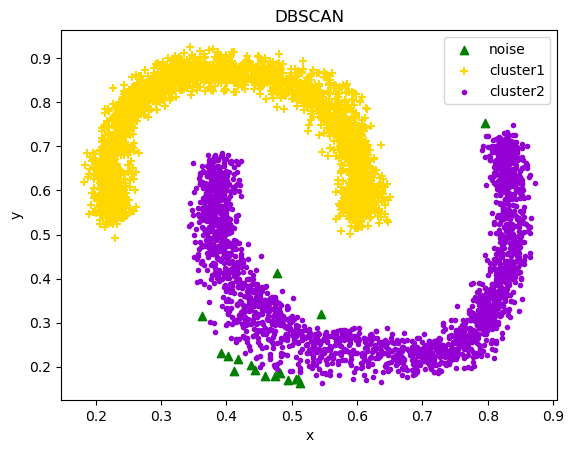

In [21]:
#chage min_samples
dbscan3 = DBSCAN(eps=0.03, min_samples=20)
y_pred_db3 = dbscan3.fit_predict(X)

plt.title('DBSCAN')
plt.xlabel('x')
plt.ylabel('y')
markers = ['^','+','.']
colormap = ['g','gold','darkviolet']
labelmap = ['noise','cluster1','cluster2']

for i,label in enumerate(np.unique(y_pred_db3)):
    cluster_mask = (y_pred_db3== label)
    plt.scatter(X[:,0][cluster_mask],X[:,1][cluster_mask],
                c=colormap[i], marker=markers[i],label=labelmap[i])
plt.legend()
plt.show()